# Bachelor Thesis Notebook

**Student**: Dragomir Balan \
**Supervisor**: Sabrina Kirrane \
**University**: Wirtschaftsuniversität Wien \
**Date**: June 2023

## Data Understanding

Link to dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [1]:
# For dataframe management
import pandas as pd
import numpy as np

# For data pre-processing
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For model-building
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm

# For explanations
import dice_ml
from dice_ml.utils import helpers
import shap
shap.initjs()

C:\All PC Files\Apps\New folder\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\All PC Files\Apps\New folder\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

In [2]:
# Reading the dataset with pandas
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Observing the shape of the dataframe
df.shape

(32581, 12)

In [4]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Column statistics
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Unique values per each column
for col in df:
    print(f"{col}: {df[col].nunique()}")

person_age: 58
person_income: 4295
person_home_ownership: 4
person_emp_length: 36
loan_intent: 6
loan_grade: 7
loan_amnt: 753
loan_int_rate: 348
loan_status: 2
loan_percent_income: 77
cb_person_default_on_file: 2
cb_person_cred_hist_length: 29


In [7]:
# Missing values per column
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
# View number of duplicated rows (exactly same)
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


## Exploratory Data Analysis

### Age:

We may observe that the median age of people taking a loan is ~26. The LQ is 20, and the UQ is 30. Additionally, we can observe lots of outliers, and some extreme values like ~120 and ~140 years old clients. We will have to remedy it in our data cleaning phase.

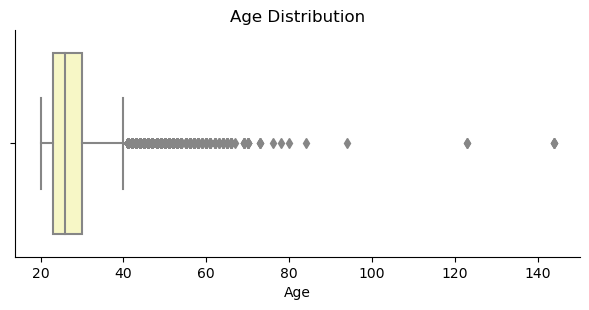

In [9]:
# Plot the boxplot
g = sns.catplot(x="person_age", kind="box", data=df, aspect=2, height=3, palette="Spectral")

# Set the labels and title
plt.xlabel("Age")
plt.title("Age Distribution")

# Show the plot
plt.show()

In [10]:
# Calculating the lower-, upper-, interquartiles, and the fences
q1 = df["person_age"].quantile(0.25)
q3 = df["person_age"].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

print("Q1:", q1, "\n"
      "Q3:", q3, "\n"
      "IQR:", iqr, "\n"
      "LF:", lower_fence, "\n"
      "UF:", upper_fence)

Q1: 23.0 
Q3: 30.0 
IQR: 7.0 
LF: 12.5 
UF: 40.5


### Income:

The income distribution is highly skewed, and would be hard to visualize without ommitting the outliers with the `sym=""` parameter. We can see that the median income is ~\\$57,000, UQ is \\$38,500, and LQ is \\$79,200.

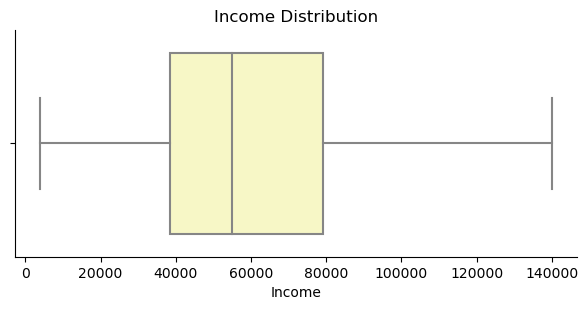

In [11]:
# Plot the boxplot
g = sns.catplot(x="person_income", kind="box", sym="", data=df, aspect=2, height=3, palette="Spectral")

# Set the labels and title
plt.xlabel("Income")
plt.title("Income Distribution")

# Show the plot
plt.show()

In [12]:
# Calculating the lower-, upper-, interquartiles, and the fences
q1 = df["person_income"].quantile(0.25)
q3 = df["person_income"].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

print("Q1:", q1, "\n"
      "Q3:", q3, "\n"
      "IQR:", iqr, "\n"
      "LF:", lower_fence, "\n"
      "UF:", upper_fence)

Q1: 38500.0 
Q3: 79200.0 
IQR: 40700.0 
LF: -22550.0 
UF: 140250.0


### Home Ownership:

In terms of home ownership, we can see that most people who took a credit are renting their home, followed by people who bought their home with a mortgage, those who own their home fully paid, and others.

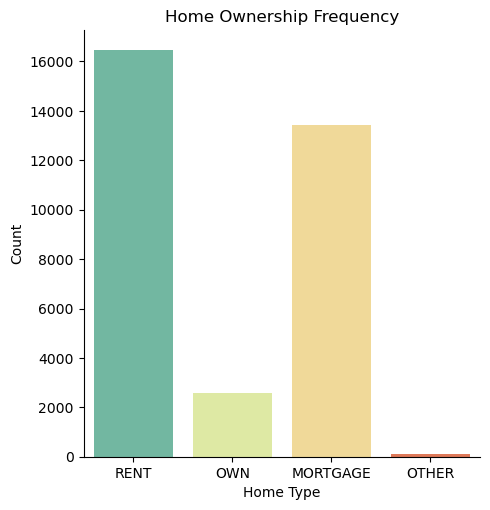

In [13]:
# Plot the catplot
g = sns.catplot(x="person_home_ownership", kind="count", data=df, height=5, palette="Spectral_r")

# Set the labels and title
plt.xlabel("Home Type")
plt.ylabel("Count")
plt.title("Home Ownership Frequency")

# Show the plot
plt.show()

### Employment:

We can see that the median employment length of a person taking a loan is ~4 years, LQ is 1, and UQ is 7. Additionally, we can observe an outlier, where one data point's employment length is ~120 years. We'll have to remove it.

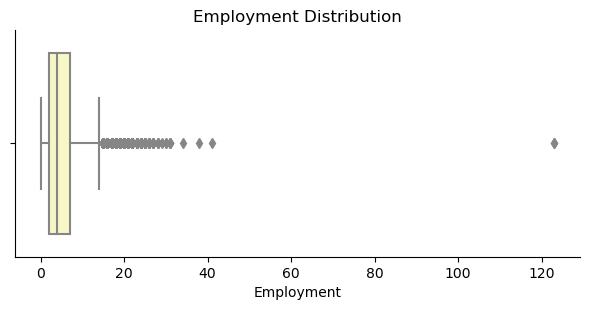

In [14]:
# Plot the boxplot
g = sns.catplot(x="person_emp_length", kind="box", data=df, aspect=2, height=3, palette="Spectral")

# Set the labels and title
plt.xlabel("Employment")
plt.title("Employment Distribution")

# Show the plot
plt.show()

In [15]:
# Calculating the lower-, upper-, and interquartiles
q1 = df["person_emp_length"].quantile(0.25)
q3 = df["person_emp_length"].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

print("Q1:", q1, "\n"
      "Q3:", q3, "\n"
      "IQR:", iqr, "\n"
      "LF:", lower_fence, "\n"
      "UF:", upper_fence)

Q1: 2.0 
Q3: 7.0 
IQR: 5.0 
LF: -5.5 
UF: 14.5


### Loan Intent:

The intentions "Education", "Medical", and "Venture" are taking the lead.

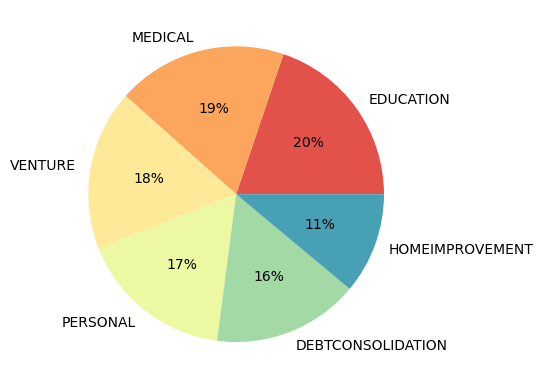

In [16]:
# Plotting the pie chart
plt.pie(df["loan_intent"].value_counts(), labels = df["loan_intent"].value_counts().index.tolist(), 
        autopct='%.0f%%', colors=sns.color_palette("Spectral"))

# Show the plot
plt.show()

### Loan Grade:

This variable entails the assignment of a quality score to a loan based on the borrower's credit history, quality of the collateral, and repayment risk <sup>[[1]](https://www.thebalancemoney.com/what-is-loan-grading-5211003)</sup>. More than 30% of the loans have been graded as A or B, and nearly 20% with C.

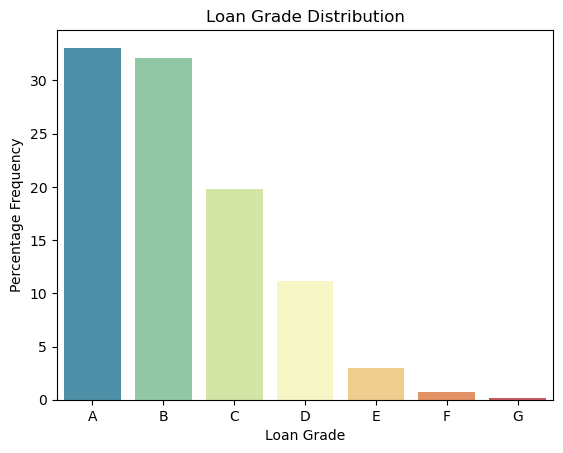

In [17]:
# Calculate the percentage frequencies
percentage_frequencies = df["loan_grade"].value_counts(normalize=True) * 100

# Plot the barplot
g = sns.barplot(x=percentage_frequencies.index, y=percentage_frequencies.values, palette="Spectral_r")

# Set the labels and title
plt.xlabel("Loan Grade")
plt.ylabel("Percentage Frequency")
plt.title("Loan Grade Distribution")

# Show the plot
plt.show()

### Loan Amount:

We can see that many clients borrowed < \\$15,000, however several also took a loan as much as \\$35,000.

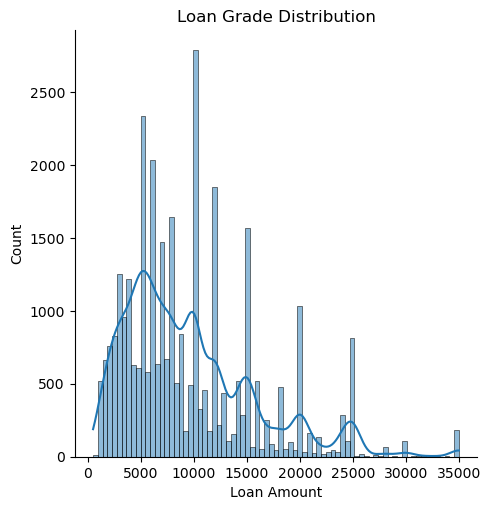

In [18]:
# Plot the distribution plot
g = sns.displot(x = "loan_amnt", data=df, kde=True, height=5)

# Set the labels and title
plt.xlabel("Loan Amount")
plt.title("Loan Grade Distribution")

plt.show()

### Loan Interest Rate:

We can observe a high distribution of the loan interest rates. There is no loan that has an interest rate less than ~5%.

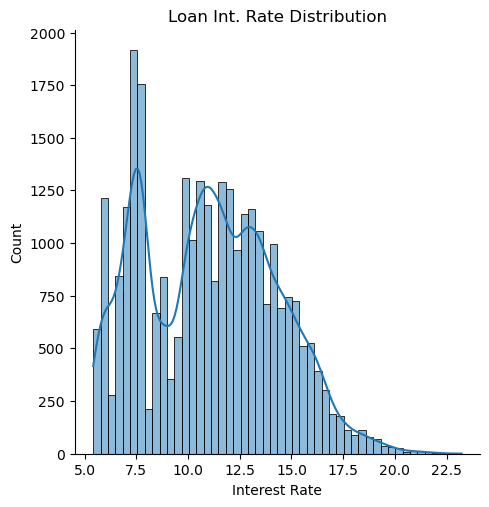

In [19]:
# Plot the distribution plot
g = sns.displot(x = "loan_int_rate", data=df, kde=True, height=5)

# Set the labels and title
plt.xlabel("Interest Rate")
plt.title("Loan Int. Rate Distribution")

plt.show()

### Loan Percent Income:
We can see that the distribution of the `loan_percent_income` variable is skewed. As well, majority of the loans have an income between 0-35%.

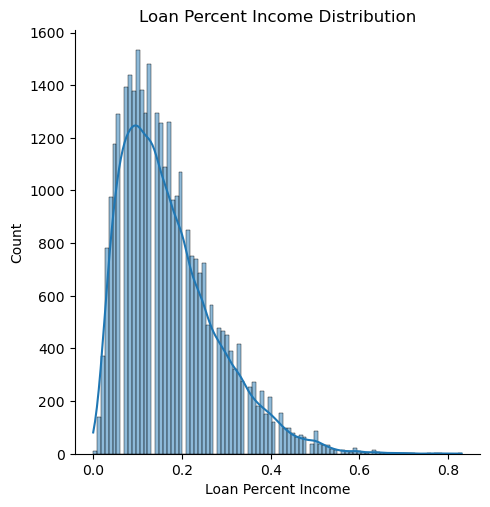

In [20]:
# Plot the distribution plot
g = sns.displot(x = "loan_percent_income", data=df, kde=True, height=5)

# Set the labels and title
plt.xlabel("Loan Percent Income")
plt.title("Loan Percent Income Distribution")

plt.show()

### Loan Status:

We can see that the distribution of the status column is very imbalanced. This could highly affect our results when building our models. We may either oversample or undersample our dataset so we can better infer our results.

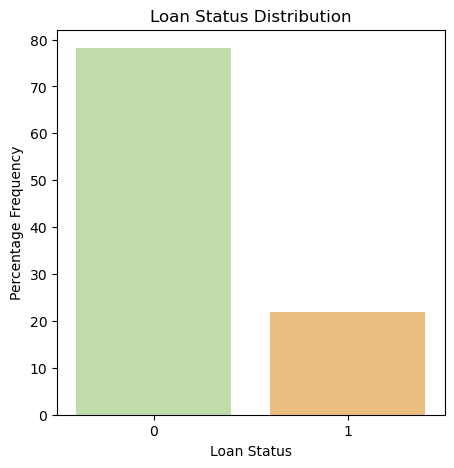

In [21]:
plt.figure(figsize=(5, 5))

# Calculate the percentage frequencies
percentage_frequencies = df["loan_status"].value_counts(normalize=True) * 100

# Plot the barplot
g = sns.barplot(x=percentage_frequencies.index, y=percentage_frequencies.values, palette="Spectral_r")

# Set the labels and title
plt.xlabel("Loan Status")
plt.ylabel("Percentage Frequency")
plt.title("Loan Status Distribution")

# Show the plot
plt.show()

### Loan Status per Loan Intent:

We may see that people who are defaulting, are defaulting the most when they borrowed with the intent to pay off their medical bills or consolidate other debt.

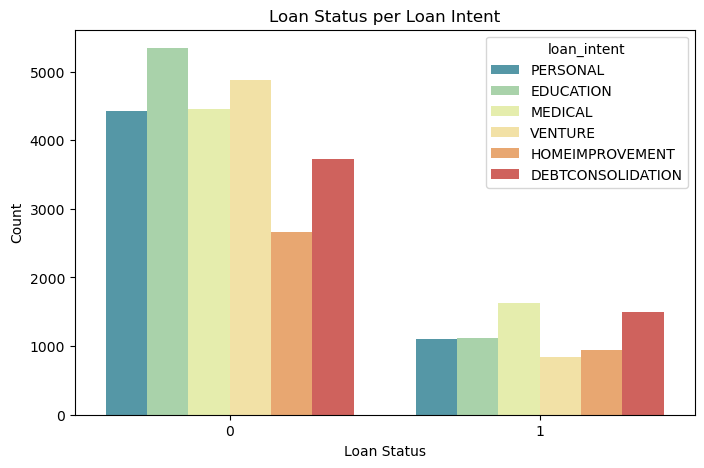

In [22]:
plt.figure(figsize=(8, 5))

# Plot the barplot
g = sns.countplot(x="loan_status", hue="loan_intent", data=df, palette="Spectral_r")
    
# Set the labels and title
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Loan Status per Loan Intent")

# Show the plot
plt.show()

### Historical Default:

We can see that only 18% of the total clients have historically defaulted on their loans, whereas 82% haven't.

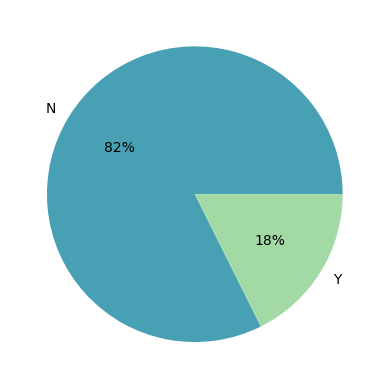

In [23]:
# Plotting the pie chart
plt.pie(df["cb_person_default_on_file"].value_counts(), 
        labels = df["cb_person_default_on_file"].value_counts().index.tolist(), autopct='%.0f%%', 
        colors=sns.color_palette("Spectral_r"))

# Show the plot
plt.show()

### Credit History Length:

We can infer that majority of the people have been paying back a credit for < 5 years. Not that many people have been holding a loan for more than 10 years.

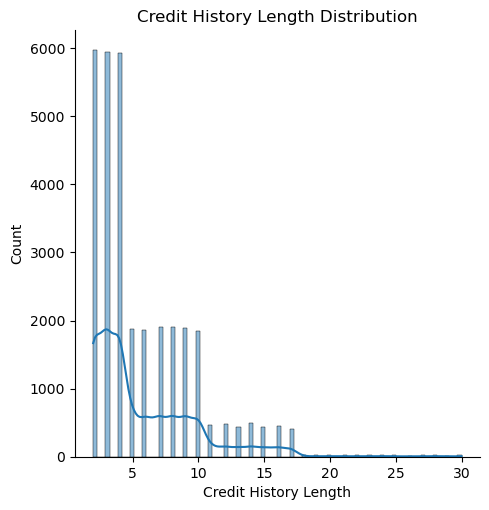

In [24]:
# Plot the distribution plot
g = sns.displot(x = "cb_person_cred_hist_length", data=df, kde=True, height=5)

# Set the labels and title
plt.xlabel("Credit History Length")
plt.title("Credit History Length Distribution")

plt.show()

### Income x Loan Amount x Default:

While we cannot infer a clear relationship between the three variables, we can observe that most of the loans where clients defaulted occurred when a client's income was < \\$100,000 per year.

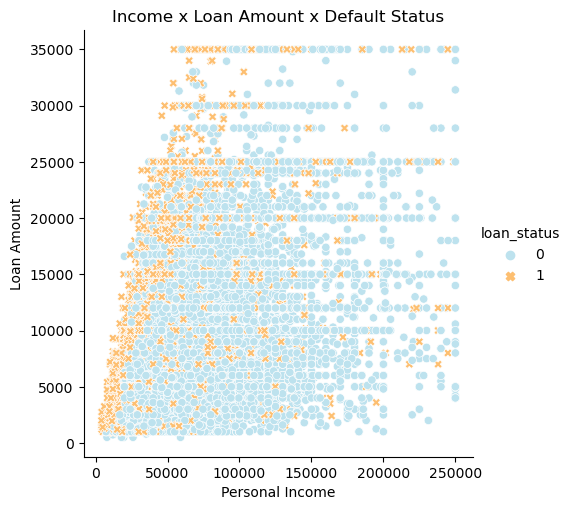

In [25]:
# Calculate the z-scores
z_scores = (df["person_income"] - df["person_income"].mean()) / df["person_income"].std()

# Define a threshold for outliers
threshold = 3

# Identify the outliers
outliers = df[abs(z_scores) > threshold].index

# Plot the relational plot
g = sns.relplot(x=df.drop(outliers)["person_income"], y="loan_amnt", data=df, kind="scatter", 
                hue="loan_status", style="loan_status", palette="RdYlBu_r")

# Set the labels and title
plt.title("Income x Loan Amount x Default Status")
plt.xlabel("Personal Income")
plt.ylabel("Loan Amount")

plt.show()

### Correlation plot:

Below, we can observe the correlation matrix for the numeric variables in our dataset. The most meaningful ones are a 0.34 (Pearson coeff.) between `loan_int_rate` & `loan_status`, and 0.27 between `person_income` & `loan_amnt`. While there are stronger relationships, such as 0.86 between `cb_person_cred_hist_length` & `person_age`, those are evident and expected due to the variables' meaning and inherent relationships.

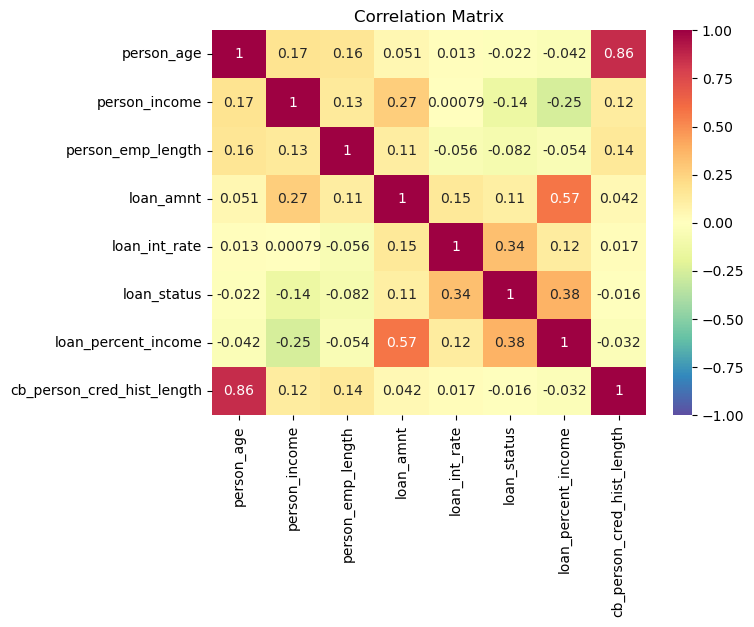

In [26]:
plt.figure(figsize=(7, 5))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral_r", vmin=-1, vmax=1)

# Set the plot title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

## Data Cleaning

### Row Filtering:

In this subsection, we are removing the extreme values as observed in the graphs above, and changing the `cb_person_default_on_file` column to be binary in int type, not strings. The other categoric columns are OneHotEncoded.

In [27]:
# Filtering for the extreme values in the `person_age` column
df = df[df["person_age"] < 100]

In [28]:
# Filtering for the extreme values in the `person_emp_length` column
df = df[df["person_emp_length"] != 123]

In [29]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

In [30]:
# Changing column to int
df["cb_person_default_on_file"] = np.where(df["cb_person_default_on_file"] == "Y", 1, 0)

### OneHotEncoding:

OneHotEncoding, or dummy-coding, the categoric variables so we can utilize them in our model-building phase.

In [31]:
# Pass our categorical features into a list
categorical_features = list(df.select_dtypes(include=['object']).columns)

# OneHotEncode the categorical features
ct = ColumnTransformer([('encode_cats', OneHotEncoder(), categorical_features),],
                       remainder='passthrough', verbose_feature_names_out=False)

# Applying the changes to the dataframe
df = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())

### Train/test Split:

Splitting the dataset into a 80% training and 20% testing cohort to ensure leakage-free changes.

In [32]:
# Assigning the predictor variables to X and the target column to y
X = df.drop(["loan_status"], axis=1)
y = df["loan_status"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, 
                                                    stratify=df['loan_status'], shuffle=True)

### Null Values Imputation:

Imputing the missing values from the `person_emp_length` and `loan_interest` columns using the `SimpleImputer()` func from the sklearn package. We use the median value since it's more representative instead of the mean.

In [33]:
# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the imputer on the testing data
X_test_imputed = imputer.transform(X_test)

# Recreate the training and testing sets into dataframes
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

print("Missing values in `person_emp_length`:", X_train.isna().sum()["person_emp_length"], "\n"
      "And in `loan_int_rate`:", X_train.isna().sum()["loan_int_rate"])

Missing values in `person_emp_length`: 0 
And in `loan_int_rate`: 0


### Oversampling:

We are using the Synthetic Minority Oversampling Technique (SMOTE) to oversample the dataset since it is highly imbalanced towards the no default class (0). 

In [34]:
# Initialize the SMOTE
oversample = SMOTE(k_neighbors=5)

# Set counter to check initial distribution of data
counter = Counter(y_train)
print("Before transform:", counter)

# Fit the oversample on the training data
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
print("After transform:", counter)

Before transform: Counter({0.0: 20257, 1.0: 5670})
After transform: Counter({1.0: 20257, 0.0: 20257})


In [35]:
# Observe shape of the train and test datasets
print(f'Shape of train set is: {X_train.shape}, shape of test set is: {X_test.shape}')

Shape of train set is: (40514, 25), shape of test set is: (6482, 25)


In [36]:
# Observe if proportionality is sustained
proportion_train = y_train.value_counts(normalize=True) 
proportion_test = y_test.value_counts(normalize=True)
print(f'Proportion of target class in train set is: {dict(proportion_train)}, and in test set: {dict(proportion_test)}')

Proportion of target class in train set is: {1.0: 0.5, 0.0: 0.5}, and in test set: {0.0: 0.781240357914224, 1.0: 0.218759642085776}


## Model-building

Initiating the model, assigning parameters for the GridSearchCV to explore (CV=5), and fitting the best selected model on the training data. Then, we test our results using the testing set, and analyse the classification report (recall, precision, f1-score), confusion matrix (TP, FP, TN, FN), and the ROC Curve (with AUC score).

In this setting, False Negatives (i.e., a client is predicted that they won't default but in truth they do) are costly, however also rejecting a client who wouldn't have defaulted is also in a bank's interest, hence False Positives also play an important role. Therefore, F1-score would be the most appropriate measure to monitor.

In [37]:
# Creating a dictionary that will be transformed in a dataframe to analyse model performance
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "LightGBM"],
    "Precision": [np.nan, np.nan, np.nan],
    "Recall": [np.nan, np.nan, np.nan],
    "F1-score": [np.nan, np.nan, np.nan],
    "AUC Score": [np.nan, np.nan, np.nan]
}

# Creating the model and setting the `Model` column as the index
df_models = pd.DataFrame(model_results)
df_models = df_models.set_index("Model")

### Logistic Regression:

In [38]:
# Initiate the LogisticRegression
log_reg = LogisticRegression()

# Observing the parameters for the LogisticRegression
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Assign parameters to the LogisticRegression classifier
parameters = {
    "penalty": ["l2", None],
    "solver": ("newton-cholesky", "lbfgs"),
    "max_iter": (10, 50)
}

# Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation
grid_models = GridSearchCV(log_reg, parameters, cv=5, n_jobs=-1, verbose=3)

# Fitting the model on the training set
grid_models.fit(X_train, y_train)

# Observe best parameters
print("Best parameters set:", grid_models.best_estimator_)

# Predicting on the test set
y_pred = grid_models.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set: LogisticRegression(max_iter=10, solver='newton-cholesky')


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      5064
         1.0       0.54      0.78      0.64      1418

    accuracy                           0.81      6482
   macro avg       0.74      0.80      0.76      6482
weighted avg       0.85      0.81      0.82      6482

Confusion Matrix:


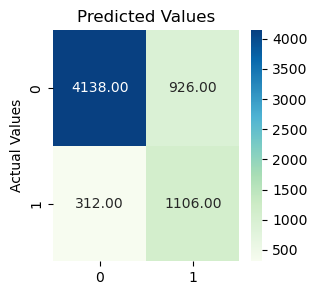

In [40]:
# Show the classification report
print("Classification Report:", "\n",
      classification_report(y_test, y_pred))

# Visualize the confusion matrix
print("Confusion Matrix:")
plt.figure(figsize=(3, 3))
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="GnBu")

# Set the labels
plt.title("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

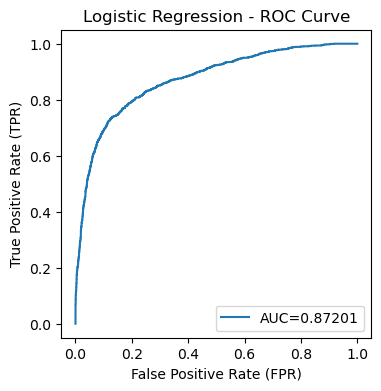

In [41]:
plt.figure(figsize=(4, 4))

# Calculating the TPR and FPR values
y_pred_proba = grid_models.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating the AUC value
log_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.title("Logistic Regression - ROC Curve")
plt.plot(fpr, tpr, label="AUC="+str(round(log_auc, 5)))
plt.ylabel("True Positive Rate (TPR)")
plt.xlabel("False Positive Rate (FPR)")
plt.legend(loc=4)

# Showing the plot
plt.show()

In [42]:
# Repeat the report, but this time outputting the dictionary with the values
report = classification_report(y_test, y_pred, output_dict=True)

# Extracting the values from the dictionary
log_precision = report['weighted avg']['precision']
log_recall = report['weighted avg']['recall']
log_f1 = report['weighted avg']['f1-score']

# Assigning to the dataframe so we can analyse model performance
df_models.at["Logistic Regression", "Precision"] = log_precision
df_models.at["Logistic Regression", "Recall"] = log_recall
df_models.at["Logistic Regression", "F1-score"] = log_f1
df_models.at["Logistic Regression", "AUC Score"] = log_auc
df_models

,Precision,Recall,F1-score,AUC Score
Model,,,,
Logistic Regression,0.845535,0.80901,0.819842,0.872012
Random Forest,NaN,NaN,NaN,NaN
LightGBM,NaN,NaN,NaN,NaN


### Random Forest:

It may appear that there aren't many parameters for the grid to search for in the Random Forest model, however it was iteratively tuned and unvaluable parameters were removed due to computing & memory restraints. 

In [43]:
# Initiate the RandomForestClassifier
rf = RandomForestClassifier()

# Observing the parameters for the RandomForestClassifier
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Assign parameters to the RandomForestClassifier
parameters = {
    "max_depth": [25, 50],
    "min_samples_leaf": [0.01, 0.1],
    "n_estimators": [200, 300],
    "max_features": [0.5, 0.8]
}

# Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation
grid_models = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=3)

# Fitting the model on the training set
grid_models.fit(X_train, y_train)

# Observe best parameters
print("Best parameters set:", grid_models.best_estimator_)

# Predicting on the test set
y_pred = grid_models.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters set: RandomForestClassifier(max_depth=50, max_features=0.5, min_samples_leaf=0.01,
                       n_estimators=300)


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      5064
         1.0       0.71      0.73      0.72      1418

    accuracy                           0.88      6482
   macro avg       0.82      0.82      0.82      6482
weighted avg       0.88      0.88      0.88      6482

Confusion Matrix:


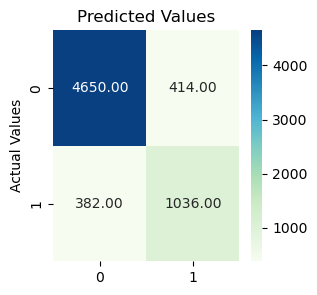

In [45]:
# Show the classification report
print("Classification Report:", "\n",
      classification_report(y_test, y_pred))

# Visualize the confusion matrix
print("Confusion Matrix:")
plt.figure(figsize=(3, 3))
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="GnBu")

# Set the labels
plt.title("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

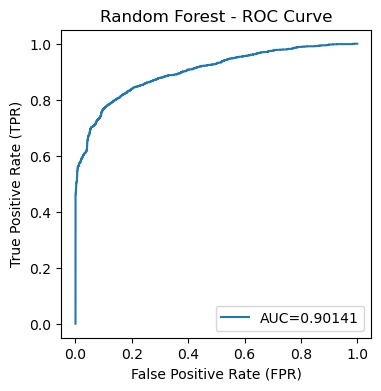

In [46]:
plt.figure(figsize=(4, 4))

# Calculating the TPR and FPR values
y_pred_proba = grid_models.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating the AUC value
rf_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.title("Random Forest - ROC Curve")
plt.plot(fpr, tpr, label="AUC="+str(round(rf_auc, 5)))
plt.ylabel("True Positive Rate (TPR)")
plt.xlabel("False Positive Rate (FPR)")
plt.legend(loc=4)

# Showing the plot
plt.show()

In [47]:
# Repeat the report, but this time outputting the dictionary with the values
rf_report = classification_report(y_test, y_pred, output_dict=True)

# Extracting the values from the dictionary
rf_precision = rf_report['weighted avg']['precision']
rf_recall = rf_report['weighted avg']['recall']
rf_f1 = rf_report['weighted avg']['f1-score']

# Assigning to the dataframe so we can analyse model performance
df_models.at["Random Forest", "Precision"] = rf_precision
df_models.at["Random Forest", "Recall"] = rf_recall
df_models.at["Random Forest", "F1-score"] = rf_f1
df_models.at["Random Forest", "AUC Score"] = rf_auc
df_models

,Precision,Recall,F1-score,AUC Score
Model,,,,
Logistic Regression,0.845535,0.809010,0.819842,0.872012
Random Forest,0.878233,0.877198,0.877689,0.901405
LightGBM,NaN,NaN,NaN,NaN


### LightGBM:

In this task, the LightGBM was hyperparameter tuned by following the advice of this [article](https://towardsdatascience.com/beginners-guide-to-the-must-know-lightgbm-hyperparameters-a0005a812702).

In [48]:
# Initiate the LGBMClassifier
lgbm_model = lgbm.LGBMClassifier()

# Observing the parameters for the LGBMClassifier
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [49]:
parameters = {
    "boosting_type": ["gbdt"],
    "n_estimators": [300, 500],
    "learning_rate": [0.01, 0.001],
    "num_leaves": [64, 128],
    "max_depth": [12, 16],
    "min_data_in_leaf": [60, 120],
    "min_gain_to_split": [0],
    "feature_fraction": [0.9],
    "bagging_fraction": [0.9],
    "bagging_freq": [1],
    "reg_alpha": [0.01]
}

# Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation
grid_models = GridSearchCV(lgbm_model, parameters, cv=5, n_jobs=-1, verbose=3)

# Fitting the model on the training set
grid_models.fit(X_train, y_train)

# Observe best parameters
print("Best parameters set:", grid_models.best_estimator_)

# Predicting on the test set
y_pred = grid_models.predict(X_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Best parameters set: LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, feature_fraction=0.9,
               learning_rate=0.01, max_depth=16, min_data_in_leaf=60,
               min_gain_to_split=0, n_estimators=500, num_leaves=128,
               reg_alpha=0.01)


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5064
         1.0       0.97      0.74      0.84      1418

    accuracy                           0.94      6482
   macro avg       0.95      0.87      0.90      6482
weighted avg       0.94      0.94      0.93      6482

Confusion Matrix:


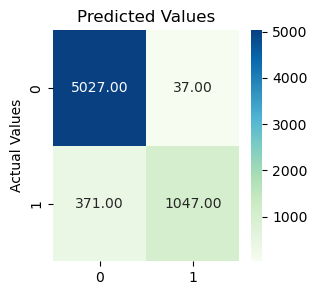

In [50]:
# Show the classification report
print("Classification Report:", "\n",
      classification_report(y_test, y_pred))

# Visualize the confusion matrix
print("Confusion Matrix:")
plt.figure(figsize=(3, 3))
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="GnBu")

# Set the labels
plt.title("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

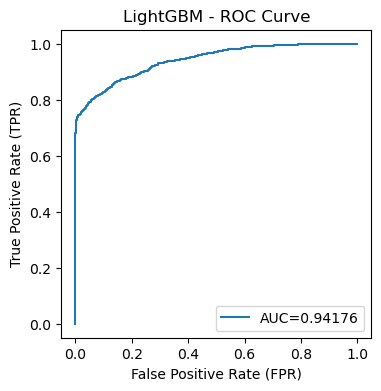

In [51]:
plt.figure(figsize=(4, 4))

# Calculating the TPR and FPR values
y_pred_proba = grid_models.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating the AUC value
lgbm_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.title("LightGBM - ROC Curve")
plt.plot(fpr, tpr, label="AUC="+str(round(lgbm_auc, 5)))
plt.ylabel("True Positive Rate (TPR)")
plt.xlabel("False Positive Rate (FPR)")
plt.legend(loc=4)

# Showing the plot
plt.show()

In [52]:
# Repeat the report, but this time outputting the dictionary with the values
lgbm_report = classification_report(y_test, y_pred, output_dict=True)

# Extracting the values from the dictionary
lgbm_precision = lgbm_report['weighted avg']['precision']
lgbm_recall = lgbm_report['weighted avg']['recall']
lgbm_f1 = lgbm_report['weighted avg']['f1-score']

# Assigning to the dataframe so we can analyse model performance
df_models.at["LightGBM", "Precision"] = lgbm_precision
df_models.at["LightGBM", "Recall"] = lgbm_recall
df_models.at["LightGBM", "F1-score"] = lgbm_f1
df_models.at["LightGBM", "AUC Score"] = lgbm_auc
df_models

,Precision,Recall,F1-score,AUC Score
Model,,,,
Logistic Regression,0.845535,0.809010,0.819842,0.872012
Random Forest,0.878233,0.877198,0.877689,0.901405
LightGBM,0.938839,0.937056,0.933860,0.941762


### Conclusion:

The best performing model is the LightGBM, with an F1-score of 0.933, and AUC score of 0.941. This model is characterized as an opaque model, and requires further explanation to analyse its behaviour.

## Model Explanation

### LightGBM Model:

In [54]:
# Initiate the LGBMClassifier
lgbm_model = lgbm.LGBMClassifier(boosting_type="gbdt", n_estimators=500, learning_rate=0.01, num_leaves=128,
                                 max_depth=16, min_data_in_leaf=60, min_gain_to_split=0, feature_fraction=0.9,
                                 bagging_fraction=0.9, bagging_freq=1, reg_alpha=0.01)

# Fitting the model on the training set
lgbm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lgbm_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5064
         1.0       0.97      0.74      0.84      1418

    accuracy                           0.94      6482
   macro avg       0.95      0.87      0.90      6482
weighted avg       0.94      0.94      0.93      6482

Confusion Matrix:


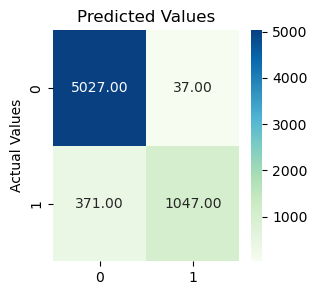

In [55]:
# Show the classification report
print("Classification Report:", "\n",
      classification_report(y_test, y_pred))

# Visualize the confusion matrix
print("Confusion Matrix:")
plt.figure(figsize=(3, 3))
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="GnBu")

# Set the labels
plt.title("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

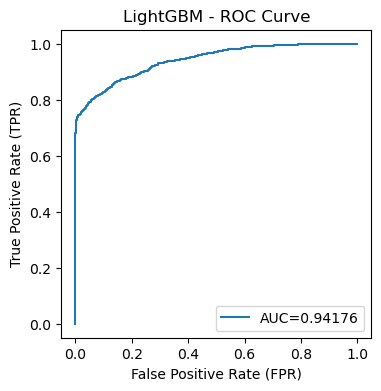

In [56]:
plt.figure(figsize=(4, 4))

# Calculating the TPR and FPR values
y_pred_proba = lgbm_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating the AUC value
lgbm_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.title("LightGBM - ROC Curve")
plt.plot(fpr, tpr, label="AUC="+str(round(lgbm_auc, 5)))
plt.ylabel("True Positive Rate (TPR)")
plt.xlabel("False Positive Rate (FPR)")
plt.legend(loc=4)

# Showing the plot
plt.show()

### Model Feature Importance:

The `sklearn` attribute `feature_importances_` shows the model's most important features that contributed to the results. We can see that `person_income` contributed the most, followed by `loan_int_rate`, `loan_percent_income`, and `loan_amnt`. Therefore, the probability of defaulting on a loan highly depends on how much a person earns yearly.

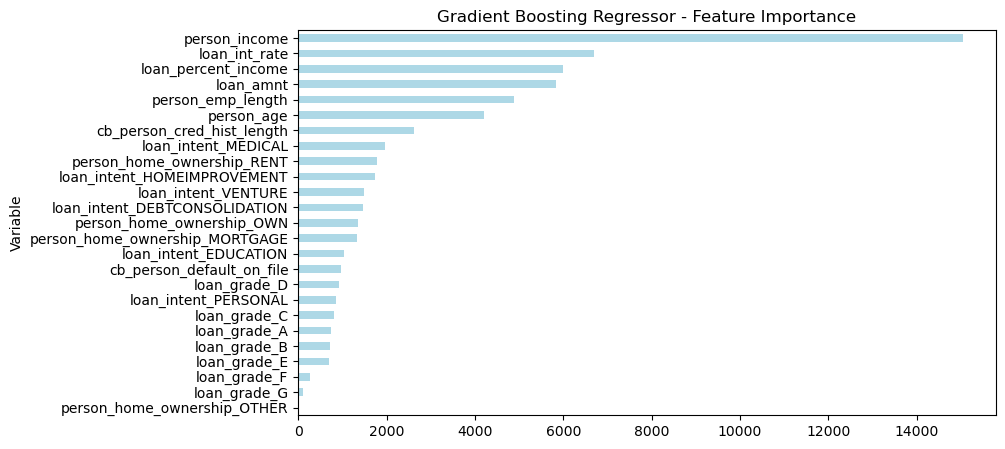

In [57]:
# Create a pd.Series of feature importances
importances_lgbm = pd.Series(lgbm_model.feature_importances_, index = lgbm_model.feature_name_)

# Sort importances_lgbm ascending
sorted_importances_lgbm = importances_lgbm.sort_values()

# Make a horizontal bar plot
g = plt.subplots(figsize=(9, 5))
sorted_importances_lgbm.plot(kind='barh', color='lightblue')

# Assign title and label
plt.title("Gradient Boosting Regressor - Feature Importance")
plt.ylabel("Variable")
plt.show()

### Global Explanation

#### Summary Plot:

In [62]:
# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(lgbm_model)

# Calculate the Shapley values
shap_values = explainer.shap_values(X_test)

In [63]:
# Verify the order of the classes
lgbm_model.classes_

array([0., 1.])

___
Feature importances are the values that state the significance of a specific feature. It doesn't tell the elasticity of the feature, rather it tells the contribution in model building. Additionally, feature importances are always adding up to 100%, or sum = 1. On the other hand, Shapley values are the elasticities of the features, meaning that they can be negative/positive <sup>[[2]](https://stackoverflow.com/a/71088839)</sup>. They are representing the payoffs of each player (variable).
___

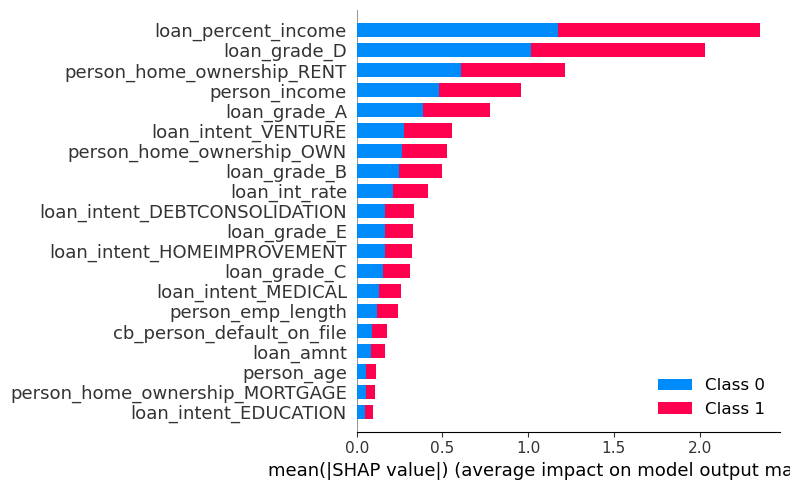

In [64]:
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=[8, 5])

#### Beeswarm Plot:

Before interpreting the variables, let us consider consider this first:

* The most important variables are sorted in descending order of importance just like in the global summary plot, starting with the most important `loan_percent_income`, `loan_grade_D`, `person_home_ownership_RENT`, `person_income`, etc.
* Each data point is represented as a point on the x-axis of the respective variable. Additionally, a collection of data points around the same SHAP value are stacked on top of each other and represented as a swarm.
* If a data point is colored red, then it means that this data point is higher on the (continuous or binary) scale, and vice versa if is colored in blue.
* If a data point has a negative SHAP value, then it means that this variable had a negative impact on the probability that a client defaults, and vice versa if it has a positive SHAP value.

Therefore, from the (global) beeswarm plot, we can interpret the following:

* `loan_percent_income`: If the loan in comparison to a client's income is higher, then the probability that they will default is also increasing. The collection of the points on the negative side of the x-axis denote that there are simply more data points that had a low `loan_percent_income` value.
* `loan_grade_D`: If this variable has value 1 instead of 0 (i.e., a client's loan is graded D), then there is a higher probability that a client will default on their loan.
* `person_home_ownership_RENT`: If a person is more likely to rent their home (rather than own or through mortage), there could be a higher probability of defaulting, however the data samples are showing that majority tend not to.
* `person_income`: The higher a person's income, the less likely are they to default on their loan.
* `loan_grade_A`: If a person's loan is graded A, then they are less likely to default on the loan. Compare with `loan_grade_D`. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


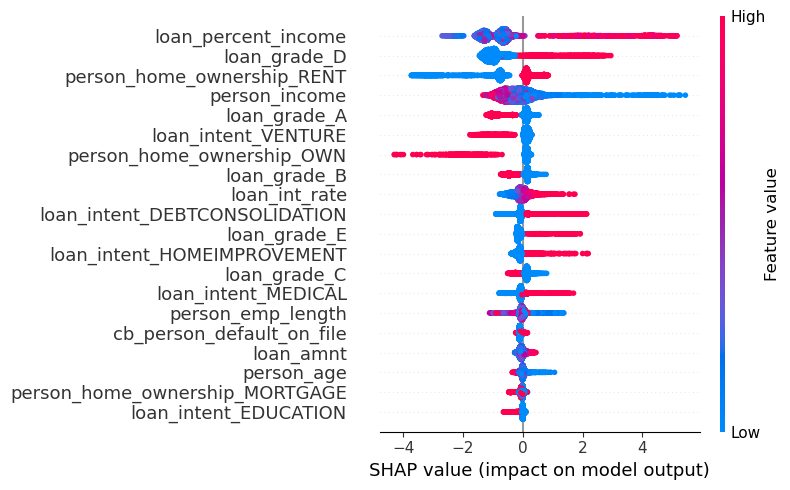

In [65]:
shap.summary_plot(shap_values[1], X_test, plot_type="dot", plot_size=[8, 5])

### Local explanations

#### Force Plot:

In [66]:
# Selecting a (random) client of interest by ID 
# In this case, we're looking at client 220 (221-1), since `pandas` uses zero-based indexing
idx = 221
df_client = X_test.iloc[idx]

# Showing their data from the X_test set
df_client

person_home_ownership_MORTGAGE        0.00
person_home_ownership_OTHER           0.00
person_home_ownership_OWN             0.00
person_home_ownership_RENT            1.00
loan_intent_DEBTCONSOLIDATION         0.00
loan_intent_EDUCATION                 0.00
loan_intent_HOMEIMPROVEMENT           1.00
loan_intent_MEDICAL                   0.00
loan_intent_PERSONAL                  0.00
loan_intent_VENTURE                   0.00
loan_grade_A                          0.00
loan_grade_B                          0.00
loan_grade_C                          0.00
loan_grade_D                          1.00
loan_grade_E                          0.00
loan_grade_F                          0.00
loan_grade_G                          0.00
person_age                           25.00
person_income                     48000.00
person_emp_length                     7.00
loan_amnt                          9000.00
loan_int_rate                        15.05
loan_percent_income                   0.19
cb_person_d

In [67]:
# Matching the client's details in the training set with the label from the test set, so we can observe if they defaulted
# on their credit or not
df_client_loanstatus = int(y_test.iloc[idx])
if df_client_loanstatus == 0:
    print("This client did NOT default.")
else:
    print("This client defaulted.")

This client defaulted.


___
Firstly, let's observe the parameters <sup>[[3]](https://github.com/slundberg/shap/issues/1252)</sup> of the `force_plot()` function.

**Parameters:**
* explainer.expected_value[1] = the base value w.r.t the defaulting class
* shap_values[1][idx, :] = the shap value w.r.t to the defaulting class and indexed observation
* X_test.iloc[idx, :] = values of the indexed observation from the test dataset

**Interpretation**:

*Base value:* The base value is the mean of the output of the trees, which for logistic regression in LightGBM is the mean of the log-odds predicted by the model <sup>[[4]](https://github.com/slundberg/shap/issues/259)</sup>. More precisely, it is the value that would be predicted if we did not know any features for the current output <sup>[[5]](https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d)</sup>.

*Variable arrows:* The red arrows (higher) can be understood as pushing the prediction higher, while the blue arrows (lower) are features that push the prediction lower <sup>[[6]](https://github.com/slundberg/shap/issues/1252)</sup>.

As such, for the client with the ID #220 that defaulted, we can interpret the following:

*Increasing probability to default:*
* `loan_intent_HOMEIMPROVEMENT`: It appears that the client took the loan for the purpose of improving their home, which contributed the most to them defaulting.
* `loan_grade_D`: The client was scored D by the loan providers, meaning that based on the client's credit history, quality of collateral etc, they are not considered as trustworthy.
* `person_home_ownership_RENT`: Since this client is renting their home, there may be a higher likelihood that they default on their loan. At first, it may be conflicting with the `loan_intent_HOMEIMPROVEMENT`, but improvement could also mean purchasing of furniture and other necessary material.

*Decreasing probability to default:*
* `person_emp_length`: This client has been working for 7 years, which lowers their probability of defaulting on their loan.
* `loan_percent_income`: The income percentage of the loan is rather low, at a value of 19%, as opposed to majority of other loans. This is because `loan_amnt` is rather small, at $9000 (`loan_percent_income` and `loan_amnt` have a pearson *r* correlation coefficient of 0.57).
* `loan_intent_DEBTCONSOLIDATION`: This variable is = 0, which is in fact contributing to lowering the probability that this client would've defaulted.

It is important to consider one last thing: **the SHAP values do not identify causality**. Causality is better identified by experimental design or similar approaches <sup>[[5]](https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d)</sup>.
___

In [68]:
shap.force_plot(explainer.expected_value[1], shap_values[1][idx, :], X_test.iloc[idx, :], 
                feature_names=X_test.columns)

# To export as an .svg using `matplotlib`
# shap.force_plot(explainer.expected_value[1], shap_values[1][idx, :], X_test.iloc[idx, :], 
#                 feature_names=X_test.columns, matplotlib=True, show=False).savefig('waterfall.svg')

### Counterfactual explanations

Now, after a loan provider would explain which data features contributed to a person defaulting, they may provide an advice to how a client can improve their financial situation so that they are guaranteed not to default on the loan. As such, we will implement counterfactual explanations that display a change in specific features where the client can improve on. For this task, we will be using the DiCE package <sup>[[7]](https://interpret.ml/DiCE/index.html)</sup>.

In [69]:
# Constructing a data object for DiCE
d = dice_ml.Data(dataframe=df, continuous_features=["person_age", "person_income", "person_emp_length", 
                                                    "loan_amnt", "loan_int_rate", "loan_percent_income",
                                                    "cb_person_cred_hist_length"], outcome_name="loan_status")
# Constructing a model object
m = dice_ml.Model(model=lgbm_model, backend="sklearn")

In [70]:
# Initializing the DiCE explainer, which requires the dataset and the model
exp = dice_ml.Dice(d, m, method="random")

___
We have allowed only the features `person_income`, `person_emp_length`, `loan_percent_income` and `cb_person_cred_hist_length` to be varied because other features can hardly be adjusted in a way that could lead to a non-defaulting situation. For instance, one cannot tell the client that if they had intended to take the loan for a different reason other than they specified, they would not default on their loan. Indeed, having a specific intention may make the loan provider wary given other circumstances, e.g., `person_income`, a person cannot change their intent and unexpectedly be accepted for their loan (of course, assuming they are truthful). Therefore, it is important to consider that there are other variables that contribute in an ensemble to a potential defaulting.

Additionally, we have specified permitted ranges for each varied feature, so that the explainer does not generate an unrealistic scenario based on a client's information (i.e., have a very high income for a rather low loan). For this specific client that defaulted, we specified:
* `percent_income`: min. income to be their current value, and the max. income to be the upper quartile of the whole dataset.
* `person_emp_length`: min. employment length to be their current value, and the maximum to be double. This doesn't mean that this person, who is aged 25, should've started working since 11, but instead that they might be able to take such a loan in the future in age range from 25 to 39.
* `cb_person_cred_hist_length`: min. value to be the desireable 0 years (i.e., no history of credit or ongoing), max. value to be their current history length.
___

In [71]:
# Set seed for reproducibility
np.random.seed(1)

# Consutrct the explainer only on specific features, given each one's feasible range according to the client / domain knowledge
e1 = exp.generate_counterfactuals(X_test[idx:idx+1], 
                                  total_CFs=2, 
                                  desired_class="opposite", 
                                  features_to_vary=["person_income", "person_emp_length", "cb_person_cred_hist_length"],
                                  permitted_range={"person_income":[9000, 79200], "person_emp_length":[7, 14],
                                                   "cb_person_cred_hist_length":[0, 3]})

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.93it/s]


In [72]:
# Display all columns in a dataframe
pd.set_option('display.max_columns', None)

# Visualize the original df, and the counterfactual set
e1.visualize_as_dataframe(show_only_changes=False)

Query instance (original outcome : 1)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,48000.0,7.0,9000.0,15.05,0.19,1.0,3.0,1



Diverse Counterfactual set (new outcome: 0.0)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,74468.3,7.0,9000.0,15.05,0.19,1.0,3.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,76731.9,7.0,9000.0,15.05,0.19,1.0,3.0,0


Overall, we can deduce that this person's yearly income needs to be higher so that they don't default on their loan. However, one should look at this result merely as an additional support, and in all cases use their domain knowledge, as well as professional and moral judgement when providing an advice.

### Conclusion

These are some of the methods we can apply to offer an explanation to the stakeholders. 

We recognize that there are numerous limitations not only to our processes, but also the methods applied. For example, there may be missing variables that would contribute to better model performance and understanding, such as loan duration (i.e., for how long is a person taking a loan, a few months or many years). Additionally, since the dataset contains simulated data (i.e., synthetic) due to privacy concerns, it is impossible to infer whether the conclusions we deduced from above are completely truthful. Therefore, we believe that this task could be further improved in the future and elaborated in closer detail.